<a href="https://colab.research.google.com/github/LoniQin/deep_learning_notebooks/blob/master/tensorflow/iris_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Classfier

## Import Dependencies

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split


#### The Iris dataset

The [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

#### Load and preprocess the data

First read in the Iris dataset using `datasets.load_iris()`, and split the dataset into training and test sets.

In [5]:
def read_in_and_split_data(iris_data):
    return train_test_split(iris_data['data'], iris_data['target'], test_size=0.2, random_state=48)

In [6]:
# Generate the test and training data.

iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

We will now convert the training and test targets using a one hot encoder.

In [7]:
# Convert targets to a one-hot encoding
train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

#### Build the neural network model


In [31]:
def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape, kernel_initializer='he_uniform', bias_initializer=tf.keras.initializers.Constant(value=1)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model

In [32]:
# Run your function to get the model
model = get_model(train_data[0].shape)

#### Compile the model

In [33]:
def compile_model(model):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.0001), 
        loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [35]:
compile_model(model)

#### Fit the model to the training data

Run the training for 800 epochs.

In [42]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=10)
history = model.fit(train_data, train_targets, epochs=100, validation_data=(test_data, test_targets), batch_size=8, callbacks=[], verbose=1)

Epoch 1/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2450 - accuracy: 0.9167 - val_loss: 0.2726 - val_accuracy: 0.9000
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2050 - accuracy: 0.9333 - val_loss: 0.2558 - val_accuracy: 0.9000
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1791 - accuracy: 0.9667 - val_loss: 0.2349 - val_accuracy: 0.9333
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1668 - accuracy: 0.9750 - val_loss: 0.2218 - val_accuracy: 0.9000
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1654 - accuracy: 0.9500 - val_loss: 0.2100 - val_accuracy: 0.9333
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1413 - accuracy: 0.9750 - val_loss: 0.2003 - val_accuracy: 0.9000
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1603 - accuracy: 0.9333 - val_loss: 0.3201 - val_accuracy: 0.9000
Epoch 8/100
1

#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss


In [44]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

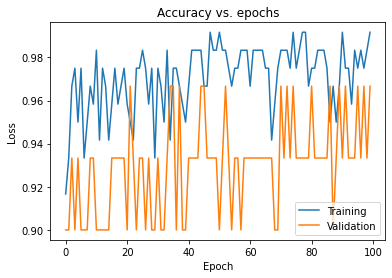

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

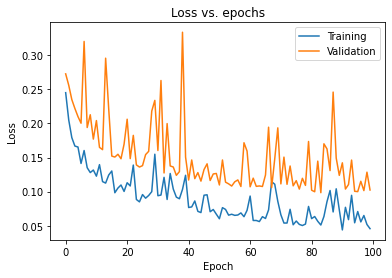

In [46]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

Oh no! We have overfit our dataset. You should now try to now try to mitigate this overfitting.

#### Reducing overfitting in the model

Define a new regularised model with the addition of two dropout layers, weight decay and a batch normalisation layer. 

In [47]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=input_shape, kernel_initializer='he_uniform', bias_initializer=tf.keras.initializers.Constant(value=1)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dropout(dropout_rate),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        BatchNormalization(),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(3, activation='softmax'),
    ])
    return model

#### Instantiate, compile and train the model

In [48]:
# Instantiate the model, using a dropout rate of 0.3 and weight decay coefficient of 0.001

reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [49]:
# Compile the model

compile_model(reg_model)

In [50]:
# Train the model

reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Epoch 1/800
15/15 [==============================] - 1s 22ms/step - loss: 2.0071 - accuracy: 0.2750 - val_loss: 1.9525 - val_accuracy: 0.1333
Epoch 2/800
15/15 [==============================] - 0s 5ms/step - loss: 1.9822 - accuracy: 0.3750 - val_loss: 1.9355 - val_accuracy: 0.3000
Epoch 3/800
15/15 [==============================] - 0s 5ms/step - loss: 1.9262 - accuracy: 0.4417 - val_loss: 1.9033 - val_accuracy: 0.3333
Epoch 4/800
15/15 [==============================] - 0s 4ms/step - loss: 1.9016 - accuracy: 0.4167 - val_loss: 1.8927 - val_accuracy: 0.3333
Epoch 5/800
15/15 [==============================] - 0s 5ms/step - loss: 1.9105 - accuracy: 0.4083 - val_loss: 1.8586 - val_accuracy: 0.3333
Epoch 6/800
15/15 [==============================] - 0s 6ms/step - loss: 1.8895 - accuracy: 0.4333 - val_loss: 1.8279 - val_accuracy: 0.3333
Epoch 7/800
15/15 [==============================] - 0s 5ms/step - loss: 1.8281 - accuracy: 0.5250 - val_loss: 1.7896 - val_accuracy: 0.4333
Epoch 8/800


#### Plot the learning curves

Let's now plot the loss and accuracy for the training and validation sets.

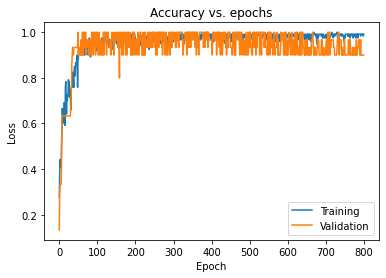

In [51]:
#Run this cell to plot the new accuracy vs epoch graph

plt.plot(reg_history.history['accuracy'])
plt.plot(reg_history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

plot the new loss vs epoch graph



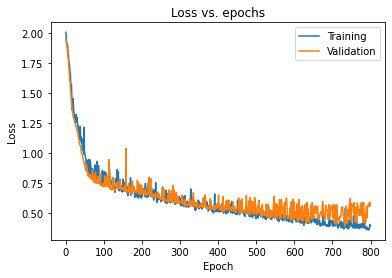

In [52]:
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

We can see that the regularisation has helped to reduce the overfitting of the network.
Incorporate callbacks into a new training run that implements early stopping and learning rate reduction on plateaux.

In [53]:
def get_callbacks():
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=30)
    learning_rate_reduction = ReduceLROnPlateau(factor=0.2, patience=20)
    return (early_stopping, learning_rate_reduction)
    

Run the cell below to instantiate and train the regularised model with the callbacks.

In [54]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

In [55]:
learning_rate_reduction.patience

20

Finally, let's replot the accuracy and loss graphs for our new model.

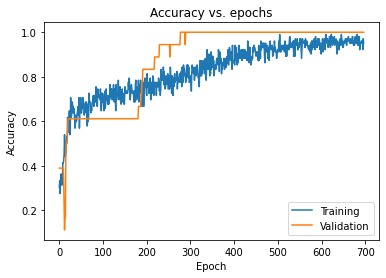

In [56]:
plt.plot(call_history.history['accuracy'])
plt.plot(call_history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

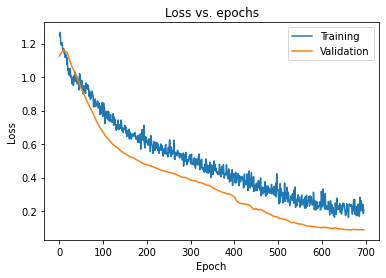

In [57]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [58]:
# Evaluate the model on the test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.185
Test accuracy: 96.67%
